In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow in c:\users\91766\anaconda3\lib\site-packages (2.12.1)




[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,    
    shear_range=0.2,   
    zoom_range=0.2,    
    horizontal_flip=True, 
    validation_split=0.2)  

dataset_path = r'C:\Users\91766\OneDrive\Documents\bimg'   
train_generator = train_datagen.flow_from_directory(
    dataset_path, 
    target_size=(150, 150), 
    batch_size=32,
    class_mode='binary', 
    subset='training') 

validation_generator = train_datagen.flow_from_directory(
    dataset_path, 
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation')  

Found 298 images belonging to 2 classes.
Found 73 images belonging to 2 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)


Epoch 1/10
9/9 [==============================] - 19s 2s/step - loss: 1.0805 - accuracy: 0.6203 - val_loss: 0.5344 - val_accuracy: 0.7344
Epoch 2/10
9/9 [==============================] - 13s 1s/step - loss: 0.4898 - accuracy: 0.7331 - val_loss: 0.6609 - val_accuracy: 0.5625
Epoch 3/10
9/9 [==============================] - 13s 1s/step - loss: 0.5331 - accuracy: 0.7256 - val_loss: 0.4655 - val_accuracy: 0.7812
Epoch 4/10
9/9 [==============================] - 13s 1s/step - loss: 0.4762 - accuracy: 0.7519 - val_loss: 0.4575 - val_accuracy: 0.7812
Epoch 5/10
9/9 [==============================] - 13s 1s/step - loss: 0.3764 - accuracy: 0.8534 - val_loss: 0.4246 - val_accuracy: 0.8438
Epoch 6/10
9/9 [==============================] - 13s 2s/step - loss: 0.2889 - accuracy: 0.8910 - val_loss: 0.3426 - val_accuracy: 0.9062
Epoch 7/10
9/9 [==============================] - 14s 2s/step - loss: 0.2404 - accuracy: 0.9098 - val_loss: 0.2029 - val_accuracy: 0.9062
Epoch 8/10
9/9 [==================

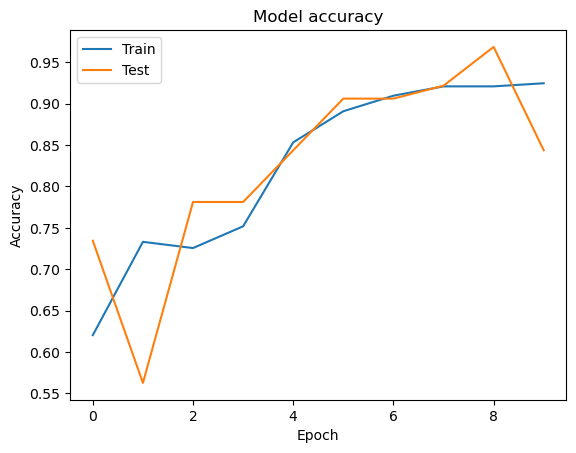

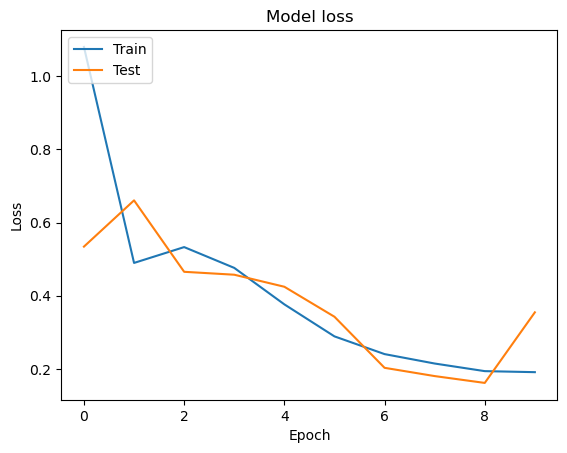

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 86ms/step
This image is 81.72 percent peacock and 18.28 percent not peacock.


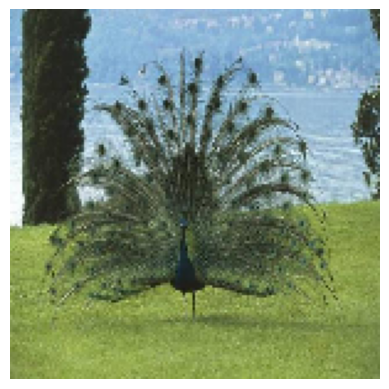

In [9]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img('pp.jpg', target_size=(150, 150))

# Convert the image to a numpy array
img_tensor = image.img_to_array(img)

img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.  
predictions = model.predict(img_tensor)
print("This image is %.2f percent peacock and %.2f percent not peacock." % (100 * predictions[0][0], 100 * (1 - predictions[0][0])))

plt.imshow(img)
plt.axis('off')  
plt.show()


In [8]:
import sys
sys.executable


'c:\\Users\\91766\\anaconda3\\python.exe'